In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_full = pd.read_csv('../reports/result_df.csv')
df_full['name'] = ['_'.join([str(x) for x in df_full.iloc[i].drop(['num', 'smape', 'mase*'])]) for i in range(len(df_full))] 
print(df_full.shape)
df = df_full[df_full['num'].isna()].dropna(axis=1)
df = df[df['loss'] != 'mse']
print(df.shape)

(1509, 10)
(79, 9)


In [3]:
def add_benchmarks():
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    plt.plot([-0.5, 200.5], [13.176, 13.176], ls='--', c='C3', label='M4 winner', lw=2)
    plt.plot([-0.5, 200.5], [12.913, 12.913], ls='--', c='C4', label='N-BEATS', lw=2)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.legend()
    
def keep_duplicates(df, column):
    
    gb = df.groupby(column)

    for group in gb.groups:
        try:
            mask.merge(gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1), how='inner')
        except NameError:
            mask = gb.get_group(group).drop([column, 'smape', 'mase*'], axis=1)
            
    results = [gb.get_group(group).merge(mask) for group in gb.groups]
    
    return pd.concat(results)

## Comparison of all models

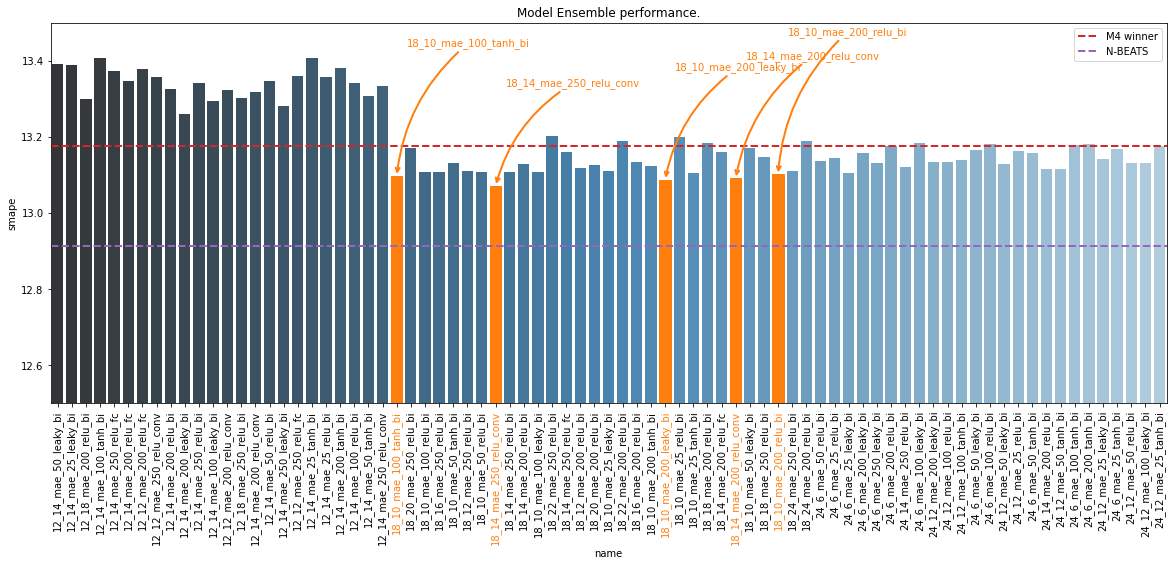

In [4]:
plt.figure(figsize=(20, 7))

top5 = df.reset_index().sort_values('smape')[:5].index

ax = sns.barplot(x='name', y='smape', data=df, palette='Blues_d')

[bar.set_color('C1') for bar in np.array(ax.get_children())[top5]]
[label.set_color('C1') for label in np.array(ax.get_xticklabels())[top5]]

for en, i in enumerate(top5):
    ax.annotate(df.iloc[i]['name'], (i, df.iloc[i]['smape']), 
                (10, 100+(en*10)), textcoords='offset points', c='C1',
                arrowprops={'arrowstyle': '->', 'color': 'C1',
                            'connectionstyle': 'arc3,rad=.2', 'lw': 2})

plt.title('Model Ensemble performance.')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()

## Input size

In [5]:
df2 = df[df.drop(['name', 'input_len', 'smape', 'mase*'], axis=1).duplicated(keep=False)].drop('name', axis=1)
df2 = keep_duplicates(df2, 'input_len')

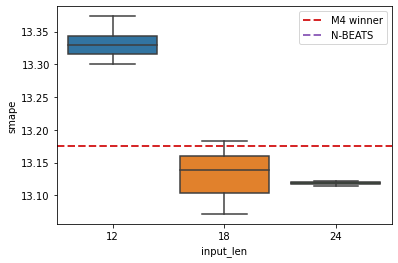

In [6]:
sns.boxplot(x='input_len', y='smape', data=df2)
add_benchmarks()

## Output size

In [7]:
df3 = keep_duplicates(df.drop('name', axis=1), 'output_len')

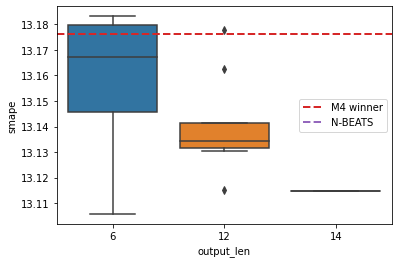

In [8]:
sns.boxplot(x='output_len', y='smape', data=df3)
add_benchmarks()

## Bottleneck

In [10]:
df4 = keep_duplicates(df.drop('name', axis=1), 'bottleneck_size')

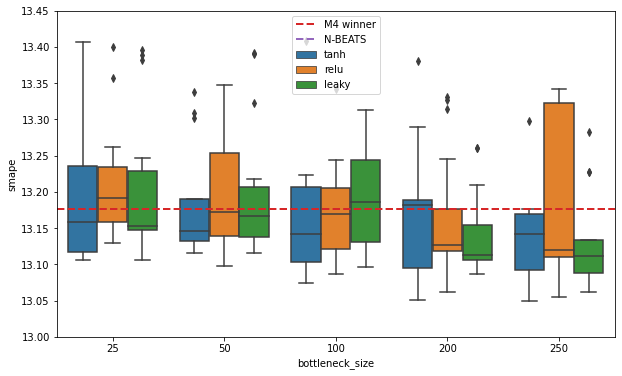

In [11]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='bottleneck_size', y='smape', data=df4, hue='bottleneck_activation')
plt.ylim([13, 13.45])
add_benchmarks()

## LSTM type

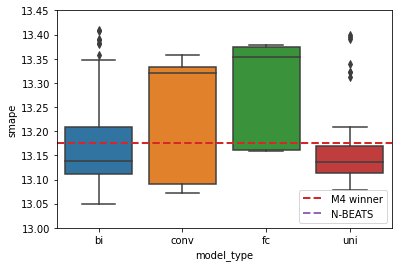

In [14]:
df5 = keep_duplicates(df.drop('name', axis=1), 'model_type')

sns.boxplot(x='model_type', y='smape', data=df5)
plt.ylim([13, 13.45])
add_benchmarks()

### 5 best models (according to SMAPE)

In [21]:
df.sort_values('smape').head(5)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,smape,mase*,name
320,18,14,mae,250,tanh,bi,13.048988,2.659102,18_14_mae_250_tanh_bi
1290,18,14,mae,200,tanh,bi,13.050298,2.668953,18_14_mae_200_tanh_bi
2013,18,8,mae,250,relu,bi,13.054597,2.663258,18_8_mae_250_relu_bi
806,18,14,mae,200,relu,bi,13.061423,2.665089,18_14_mae_200_relu_bi
1422,18,14,mae,250,leaky,bi,13.061917,2.672153,18_14_mae_250_leaky_bi


## 30+ model ensembles

In [57]:
df6 = df.merge(df_full[df_full['num'] == 29].drop(['num', 'smape', 'mase*'], axis=1), on='name')

In [65]:
df6['input_len_y']

0      12
1      12
2      12
3      12
4      12
       ..
137    12
138    18
139    18
140    18
141    18
Name: input_len_y, Length: 142, dtype: int64

In [66]:
df.shape

(221, 9)

In [68]:
a.shape

(62, 7)

In [71]:
df['name'].unique().shape

(183,)

In [82]:
b = pd.DataFrame({'name':a['name'].unique()})

In [84]:
b.shape

(40, 1)

In [89]:
a[a['name'].duplicated()]

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,name
2615,18,12,mae,250,relu,bi,18_12_mae_250_relu_bi
2646,18,12,mae,200,relu,bi,18_12_mae_200_relu_bi
2812,18,12,mae,200,leaky,bi,18_12_mae_200_leaky_bi
2913,18,12,mae,250,relu,bi,18_12_mae_250_relu_bi
3014,18,12,mae,200,tanh,bi,18_12_mae_200_tanh_bi
3126,18,12,mae,200,relu,bi,18_12_mae_200_relu_bi
3238,18,12,mae,250,tanh,bi,18_12_mae_250_tanh_bi
3372,18,12,mae,250,leaky,bi,18_12_mae_250_leaky_bi
3621,12,14,mae,250,relu,bi,12_14_mae_250_relu_bi
3714,18,12,mae,200,relu,bi,18_12_mae_200_relu_bi


In [83]:
pd.merge(df, b, how='inner', on='name')

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type,smape,mase*,name
0,12,14,mae,200,relu,bi,13.314939,2.270075e+14,12_14_mae_200_relu_bi
1,12,14,mae,200,relu,bi,13.326855,2.518002e+00,12_14_mae_200_relu_bi
2,12,14,mae,250,relu,bi,13.322058,2.270075e+14,12_14_mae_250_relu_bi
3,12,14,mae,250,relu,bi,13.341430,2.522677e+00,12_14_mae_250_relu_bi
4,12,14,mae,250,relu,bi,13.341430,2.522677e+00,12_14_mae_250_relu_bi
...,...,...,...,...,...,...,...,...,...
61,12,14,mae,250,relu,conv,13.333047,2.507935e+00,12_14_mae_250_relu_conv
62,18,14,mae,250,relu,conv,13.071463,2.677359e+00,18_14_mae_250_relu_conv
63,18,14,mae,200,relu,fc,13.160016,2.692926e+00,18_14_mae_200_relu_fc
64,18,14,mae,200,relu,conv,13.091388,2.683784e+00,18_14_mae_200_relu_conv


In [67]:
a = df_full[df_full['num'] == 29].drop(['num', 'smape', 'mase*'], axis=1)

In [26]:
df_full[df_full['num'] >= 30].drop(['num', 'smape', 'mase*'], axis=1)

,input_len,output_len,loss,bottleneck_size,bottleneck_activation,model_type
516,18,12,mae,200,relu,bi
517,18,12,mae,200,relu,bi
518,18,12,mae,200,relu,bi
519,18,12,mae,200,relu,bi
520,18,12,mae,200,relu,bi
...,...,...,...,...,...,...
3438,18,12,mae,250,leaky,bi
3439,18,12,mae,250,leaky,bi
3440,18,12,mae,250,leaky,bi
3441,18,12,mae,250,leaky,bi


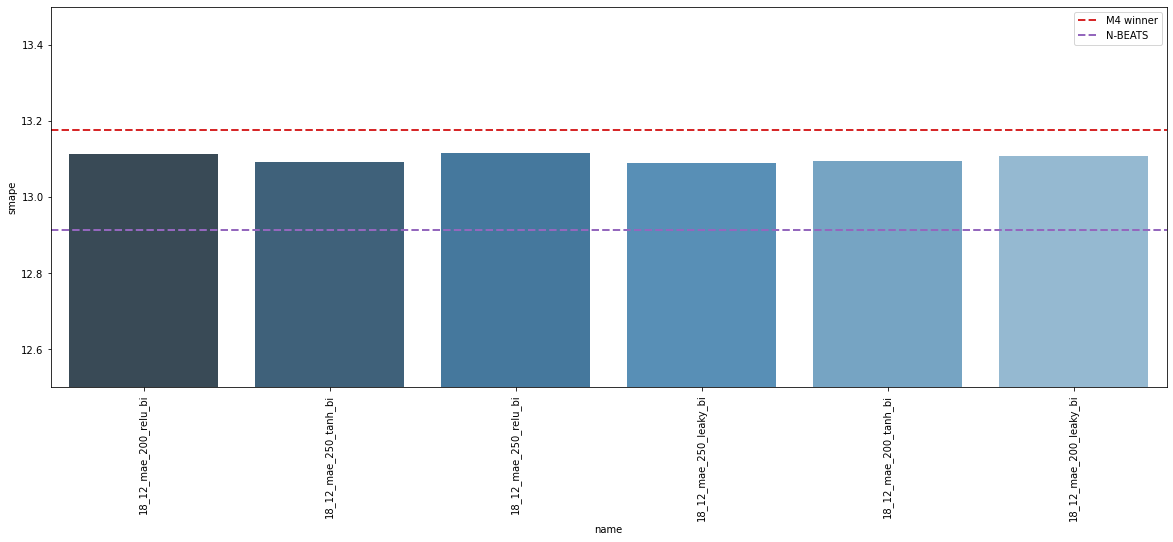

In [38]:
plt.figure(figsize=(20, 7))
sns.barplot(x='name', y='smape', data=df6, palette='Blues_d')
plt.ylim([12.5, 13.5])

plt.xticks(rotation=90)

add_benchmarks()